# Student Performance Analysis



**In this Exploratory Data Analysis (EDA), this study will examine the dataset named as "Student Performance" which can also be reached via the 'stud.csv' file at Kaggle website [link to dataset](https://www.kaggle.com/code/spscientist/student-performance-in-exams/input).**

**This study, in general, will cover what a Data scientist  can do as much as possible for a better understanding with the given dataset not only by examining its various aspects but also visualising it. The main goal of this study is to find out the factors that affect the students' performance.**

## importing the necessary libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format

# Importing plotly and cufflinks in offline mode
import plotly.express as px
import cufflinks as cf
import plotly.offline

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.warn("this will not show")

# Figure & Display options
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
import matplotlib.colors as mcolors
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

from termcolor import colored
import missingno as msno

import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored, cprint

# Import Pandas Profiling
import pandas_profiling

## User defined functions

In [4]:
###############################################################################

def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values


def missing_values(df):
    return missing(df)[missing(df)['Missing_Number'] > 0]


###############################################################################

def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum() / df.shape[0] * 100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna=False))


def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape, '\n',
          f"There is ", df.shape[0], " observation and ", df.shape[1], " columns in the dataset.", '\n',
          colored('-' * 79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n',
          colored('-' * 79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(), '\n',
          colored('-' * 79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df), '\n',
          colored('-' * 79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns), '\n',
          colored('-' * 79, 'red', attrs=['bold']), sep='')

    df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns), '\n',
          colored('-' * 79, 'red', attrs=['bold']), sep='')


def duplicate_values(df):
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("duplicates were dropped", attrs=['bold']), '\n',
              colored('-' * 79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("No duplicates", attrs=['bold']), '\n',
              colored('-' * 79, 'red', attrs=['bold']), sep='')


def drop_columns(df, drop_columns):
    if drop_columns != []:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary drop some columns!!!', attrs=['bold']),
              '\n',
              colored('-' * 79, 'red', attrs=['bold']), sep='')


def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i] / df.shape[0] * 100) > limit:
            print(df.isnull().sum()[i], 'percent of', i, 'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
        else:
            print(df.isnull().sum()[i], '%, percentage of missing values of', i, 'less than limit', limit,
                  '%, so we will keep it.')
    print('New shape after missing value control:', df.shape)

###############################################################################

## Importing the dataset

In [5]:
df0 = pd.read_csv("data/stud.csv")
df = df0.copy()

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION
**Before performing Machine Learning algorithms, we need to know the data well in order to label the observations correctly. we need to analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps to internalize the data.**

**So, in this Exploratory Data Analysis section the data will be analyzed by summarizing its main characteristics, using statistical graphics and other data visualization methods. As such the reader will be familiar with what the data can tell.**

**The Framework in This Section:**

    1. Implement basic steps to see how is your data looks like
    2. Check for missing values
    3. Drop the features that not suitable for modelling
    4. Implement basic visualization steps such as histogram, countplot, heatmap
    5. Convert categorical variables to dummy variables

In [11]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 1. Implement basic steps to see how the data looks like

In [12]:
first_looking(df)

Shape:(1000, 8)
There is 1000 observation and 8 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
-------------------------------------------------------------------------------
Number of Uniques:
gender     

In [13]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

There is 1000 observation and 8 columns in the dataset


In [18]:
missing(df)

,Missing_Number,Missing_Percent
gender,0,0.00
race_ethnicity,0,0.00
parental_level_of_education,0,0.00
lunch,0,0.00
test_preparation_course,0,0.00
math_score,0,0.00
reading_score,0,0.00
writing_score,0,0.00


In [19]:
missing_values(df)

,Missing_Number,Missing_Percent


In [14]:
duplicate_values(df)

No duplicates
-------------------------------------------------------------------------------


In [17]:
df.duplicated().value_counts()

False    1000
dtype: int64

In [15]:
# to find how many unique values numerical features have
for col in df.select_dtypes(include=[np.number]).columns:
  print(colored(f"{col}", 'green', attrs=['bold']), f"feature has", colored(f"{df[col].nunique()}", 'green', attrs=['bold']), f"unique values.")

math_score feature has 81 unique values.
reading_score feature has 72 unique values.
writing_score feature has 77 unique values.


In [16]:
# to find how many unique values object features have
for col in df.select_dtypes(include="object").columns:
  print(colored(f"{col}", 'green', attrs=['bold']), f"feature has", colored(f"{df[col].nunique()}", 'green', attrs=['bold']), f"unique values.")

gender feature has 2 unique values.
race_ethnicity feature has 5 unique values.
parental_level_of_education feature has 6 unique values.
lunch feature has 2 unique values.
test_preparation_course feature has 2 unique values.


### statistical summary of numerical features

In [23]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
math_score,1000.00,66.09,15.16,0.00,57.00,66.00,77.00,100.00
reading_score,1000.00,69.17,14.60,17.00,59.00,70.00,79.00,100.00
writing_score,1000.00,68.05,15.20,10.00,57.75,69.00,79.00,100.00


### statistical summary of categorical features

In [21]:
df.describe(include="object")

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [24]:
df_temp = df.corr()

feature =[]
collinear=[]

for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .85 and df_temp[col][i] < 1) or (df_temp[col][i]< -.85 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                print(Fore.RED + f"\033[1mmulticolinearity alert\033[0m between {col} - {i}")
        else:
            print(f"For {col} and {i}, there is \033[1mNO multicollinearity problem\033[0m")

unique_list = list(set(feature+collinear))

print(colored('*'*80, 'cyan', attrs=['bold']))
print("\033[1mThe total number of strong corelated features:\033[0m", len(unique_list))

For math_score and math_score, there is NO multicollinearity problem
For math_score and reading_score, there is NO multicollinearity problem
For math_score and writing_score, there is NO multicollinearity problem
For reading_score and math_score, there is NO multicollinearity problem
For reading_score and reading_score, there is NO multicollinearity problem
multicolinearity alert between reading_score - writing_score
For writing_score and math_score, there is NO multicollinearity problem
multicolinearity alert between writing_score - reading_score
For writing_score and writing_score, there is NO multicollinearity problem
********************************************************************************
The total number of strong corelated features: 2


###  Box plot of test scores by gender

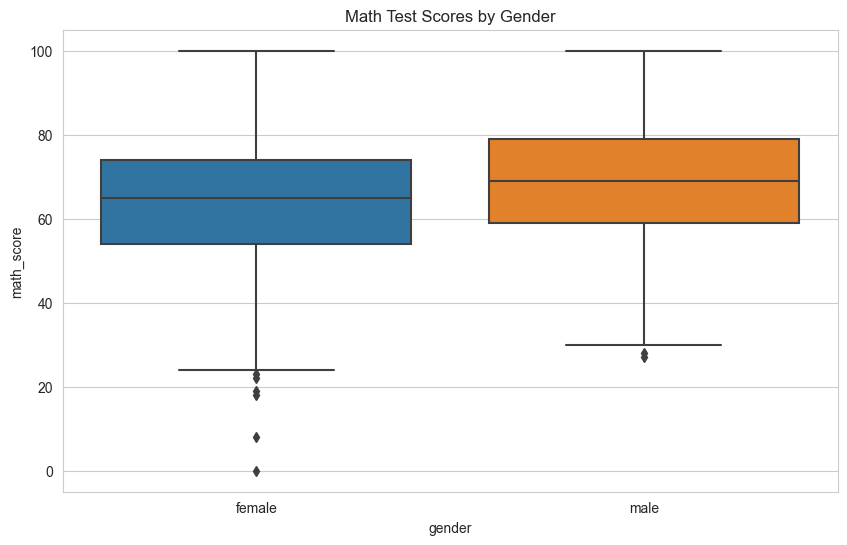

In [25]:
sns.boxplot(x="gender", y="math_score", data=df)
plt.title("Math Test Scores by Gender")
plt.show()

We can see that the median math score for males is slightly higher than females, and there is more variability in the scores for males.

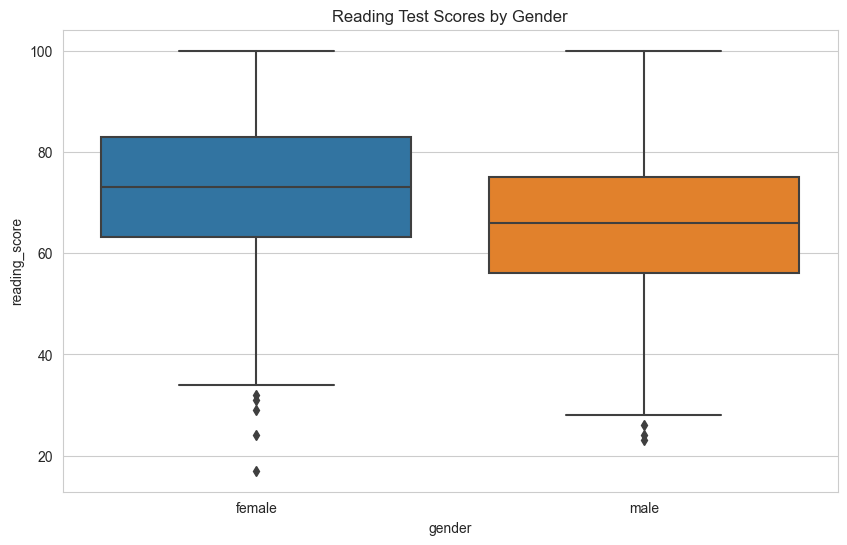

In [26]:
sns.boxplot(x="gender", y="reading_score", data=df)
plt.title("Reading Test Scores by Gender")
plt.show()

 We can see that the median reading score for females is slightly higher than males,

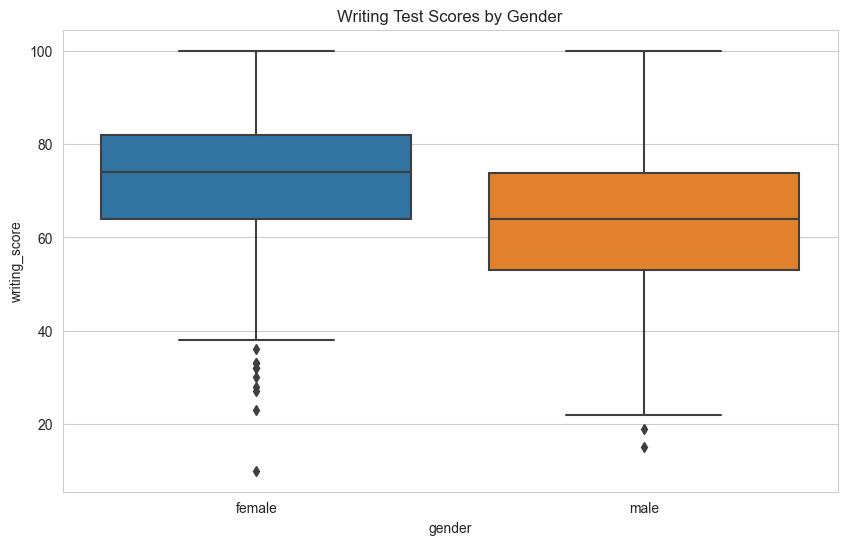

In [30]:
sns.boxplot(x="gender", y="writing_score", data=df)
plt.title("Writing Test Scores by Gender")
plt.show()

 We can see that the median writing score for females is slightly higher than males,

### Bar plot of test scores by lunch type

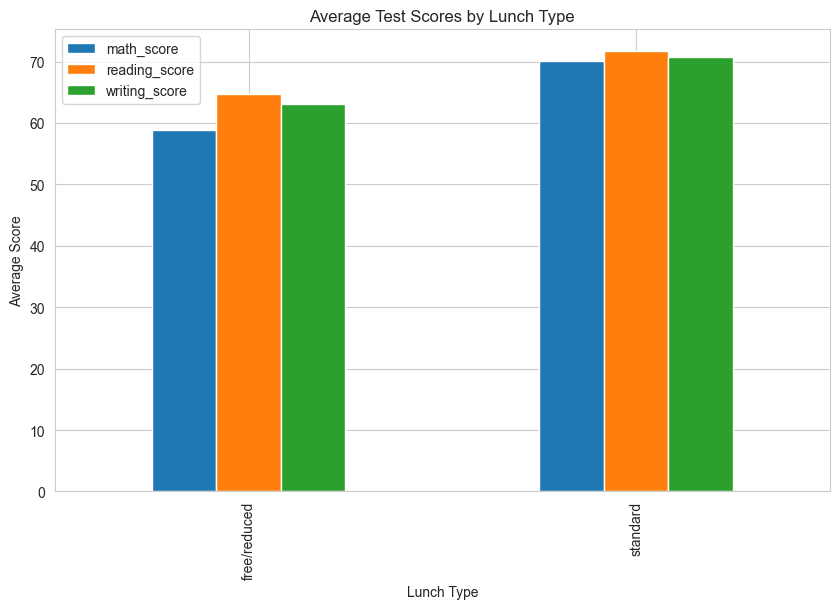

In [31]:
lunch_scores = df.groupby("lunch").mean()[["math_score", "reading_score", "writing_score"]]
lunch_scores.plot(kind="bar")
plt.title("Average Test Scores by Lunch Type")
plt.xlabel("Lunch Type")
plt.ylabel("Average Score")
plt.show()

We can see that students who receive standard lunch have higher average scores in all three tests compared to students who receive free/reduced lunch.

 ### Scatter plot of test scores by parental education level

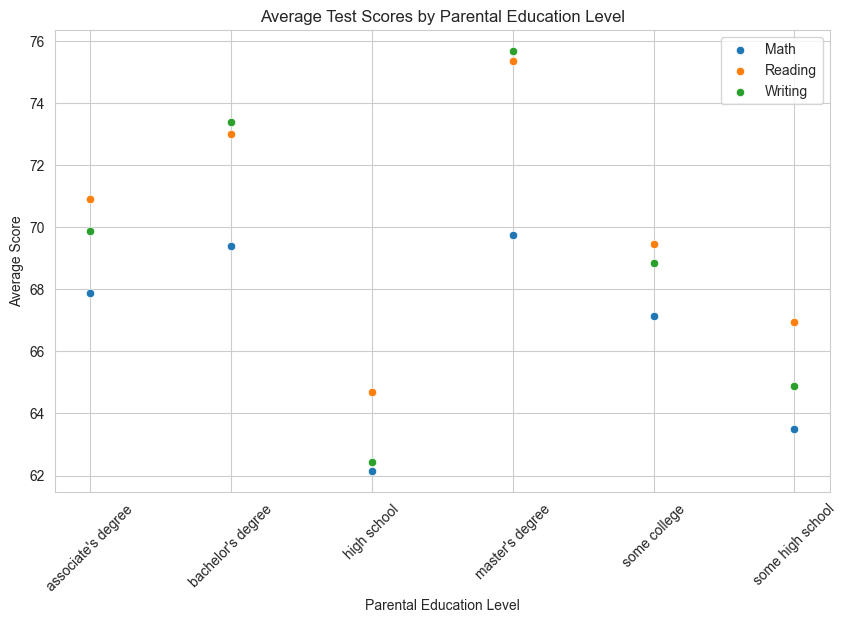

In [33]:
edu_scores = df.groupby("parental_level_of_education").mean()[["math_score", "reading_score", "writing_score"]]
edu_scores["parental_level_education"] = edu_scores.index
sns.scatterplot(x="parental_level_education", y="math_score", data=edu_scores, label="Math")
sns.scatterplot(x="parental_level_education", y="reading_score", data=edu_scores, label="Reading")
sns.scatterplot(x="parental_level_education", y="writing_score", data=edu_scores, label="Writing")
plt.title("Average Test Scores by Parental Education Level")
plt.xticks(rotation=45)
plt.xlabel("Parental Education Level")
plt.ylabel("Average Score")
plt.legend()
plt.show()

We can see thatstudents whose parents have higher education levels tending to have higher average scores.

### Count plot of test preparation status by race/ethnicity

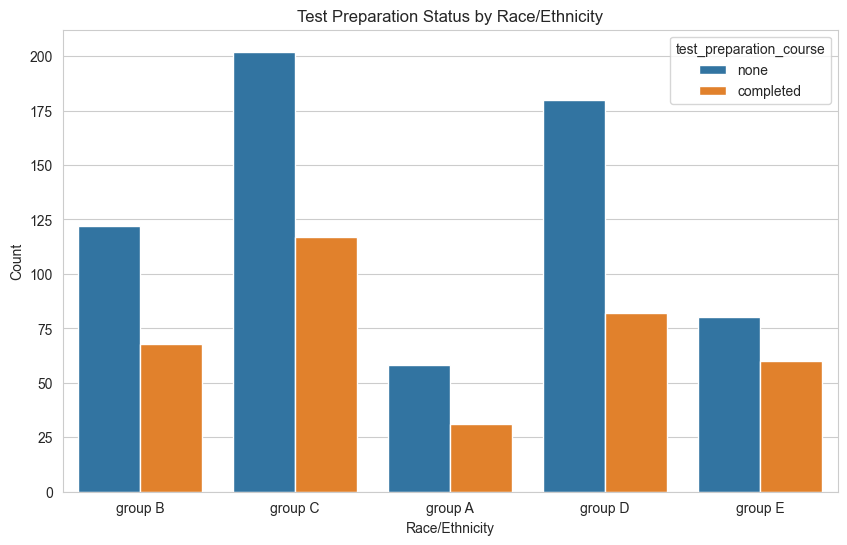

In [37]:
sns.countplot(x="race_ethnicity", hue="test_preparation_course", data=df)
plt.title("Test Preparation Status by Race/Ethnicity")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Count")
plt.show()


We can see that students from group C tend to have completed test preparation more frequently than students from other groups.

In [7]:
# total score of each student
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
# average score of each student
df['average_score'] = df['total_score'] / 3

In [10]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [12]:
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()
math_less_20 = df[df['math_score'] <= 20]['average_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


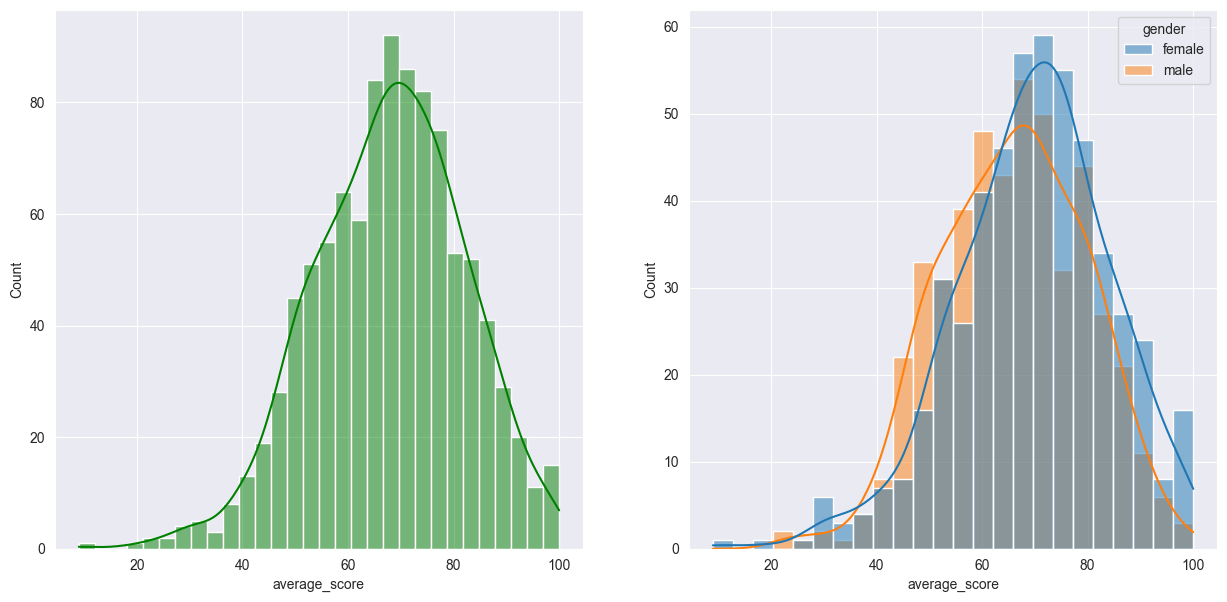

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

 females tend to have higher average score than males

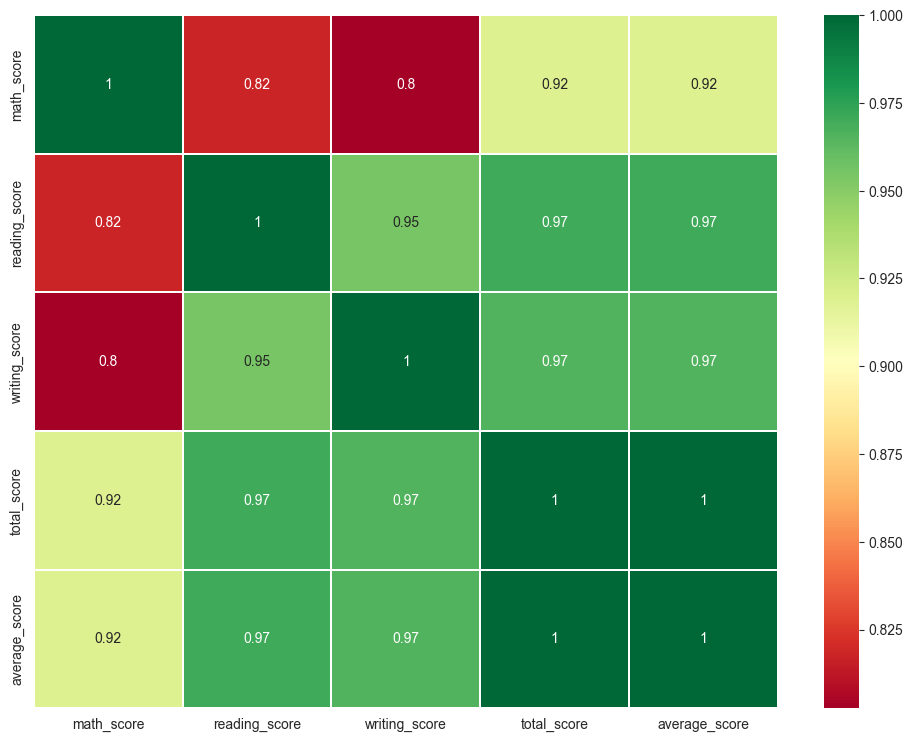

In [12]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True,cmap="RdYlGn", linewidths=0.2);